<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.503 · Programación para la ciencia de datos</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programación para la ciencia de datos - PEC4
============================

En este Notebook encontraréis un ejercicio que supone la cuarta actividad de evaluación continuada (PEC) de la asignatura. Esta PEC consta de un único ejercicio a resolver, que engloba muchos de los conceptos cubiertos durante la asignatura.

El objetivo de este ejercicio es desarrollar un **paquete de Python**, fuera del entorno de Notebooks, que nos permita resolver el problema dado. Este tendrá que incluir el correspondiente código organizado lógicamente (separado en módulos, organizados por funcionalidad), la documentación del código (docstrings) y tests. Además, se deben incluir los correspondientes archivos de documentación de alto nivel (README), así como los archivos de licencia y dependencias (`requirements.txt`). 

Se nos pide que implementemos un paquete de Python que sea capaz de realizar un análisis de datos
con información genética sobre el Bacilo de Koch. En particular, nos centraremos en las *pautas abiertas de lectura* de los genes del [Bacilo de Koch](https://en.wikipedia.org/wiki/mycobacterium_tuberculosis). Las *pautas abiertas de lectura* son más conocidas por su acrónimo *ORF* que viene de su nombre en inglés *open reading frame*. El [ORF](http://bioweb.uwlax.edu/genweb/molecular/seq_anal/translation/translation.html) es una secuencia de nucleótidos que potencialmente puede codificar una proteína. En los organismos eucariontes, como somos los seres humanos, cada gen tiene un único ORF. Pero este no es el caso de las bacterias, que son organismos procariontes.

# Los datos

Los datos a analizar nos son proporcionados en dos colecciones de datos separadas: `tb_functions.pl` y `orfs/tb_data_0x.pl`. Estos datos provienen del [repositorio UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/m.+Tuberculosis+Genes) y tienen formado de *datalog*.

`tb_functions.pl` contiene información general sobre los genes y sus clases funcionales. Mientras que `tb_data_0X.pl` contiene información detallada sobre todos los genes indicados.

Echando un vistazo a los archivos proporcionados, podréis ver que los diferentes archivos contienen bastante información. Para resolver el ejercicio propuesto, sólo será necesario usar una cantidad muy reducida de esta.


## tb_functions.pl
El archivo `tb_functions.pl` contiene información sobre 123 clases funcionales de ORFs y tiene la siguiente estructura:

```
class([1,0,0,0],"Small-molecule metabolism ").
class([1,1,0,0],"Degradation ").
class([1,1,1,0],"Carbon compounds ").
function(tb186,[1,1,1,0],'bglS',"beta-glucosidase").
function(tb2202,[1,1,1,0],'cbhK',"carbohydrate kinase").
function(tb727,[1,1,1,0],'fucA',"L-fuculose phosphate aldolase").
class([1,1,2,0],"Amino acids and amines ").
function(tb1905,[1,1,2,0],'aao',"D-amino acid oxidase").
function(tb2531,[1,1,2,0],'adi',"ornithine/arginine decarboxylase").
function(tb2780,[1,1,2,0],'ald',"L-alanine dehydrogenase").
function(tb1538,[1,1,2,0],'ansA',"L-asparaginase").
...
```

Donde hay dos tipos de entrada:

`class`: tiene 2 elementos separados por comas siempre presentados en el siguiente orden:
* *identificador de la clase*: lista de 4 números que describe la clase en 4 dimensiones diferentes (separados por comas y entre corchetes), y
* *descripción de la clase*: string que contiene la descripción de la clase, ninguna clase comparte descripción con otra clase (string entre comillas dobles).

`function`: tiene 4 elementos separados por comas siempre presentados en el siguiente orden:
* *ORF*: pauta abierta de lectura (en inglés *open reading frame*) (string sin comillas),
* *identificador de la clase*: lista de 4 números que describe la clase en 4 dimensiones diferentes (separados por comas y entre corchetes),
* *nombre del gen*: nombre del gen o valor *null* si el gen no tiene nombre (string entre comillas simples), y
* *descripción ORF*: descripción de la pauta de lectura (string entre comillas dobles).

## tb_data_0X.pl
Los archivos `tb_data_0X.pl` tienen la siguiente estructura:

```
begin(model(tb4)).
tb_protein(tb4).
function(5,0,0,0,'null','null').
coding_region(4434,4994).
tb_mol_wt(19934).
...
sequence_length(187).
amino_acid_pair_ratio(a,a,24.8).
amino_acid_pair_ratio(a,c,0.0).
amino_acid_pair_ratio(a,d,0.0).
amino_acid_pair_ratio(a,e,18.6).
amino_acid_pair_ratio(a,f,0.0).
amino_acid_pair_ratio(a,g,12.4).
...
tb_to_tb_evalue(tb3671,1.100000e-01).
tb_to_tb_evalue(tb405,4.300000e-01).
tb_to_tb_evalue(tb3225,5.600000e-01).
...
species(p35925,'streptomyces_coelicolor').
classification(p35925,bacteria).
classification(p35925,firmicutes).
classification(p35925,actinobacteria).
classification(p35925,actinobacteridae).
classification(p35925,actinomycetales).
classification(p35925,streptomycineae).
classification(p35925,streptomycetaceae).
classification(p35925,streptomyces).
mol_wt(p35925,19772).
keyword(p35925,'hypothetical_protein').
db_ref(p35925,embl,l27063,g436026,null).
signalip(c,35,no).
signalip(y,35,no).
signalip(s,54,no).
signalip(ss,1,34,no).
signalip(cleavage,null,null).
hydro_cons(-0.498,-0.474,0.624,3.248,0.278).
end(model(tb4)).
begin(model(tb5)).
...
end(model(tb3915)).
```

Donde los datos para un único ORF están capturados entre los delimitadores:
```
begin(model(ORF))
end(model(ORF))
```

Y el atributo `tb_tono_tb_evalue(ORF, E-value)` muestra la relación con otros ORFs.

# Ejercicio

Primero, será necesario que leáis los archivos facilitados de la forma más óptima teniendo en cuenta las tareas pedidas. Tendréis que justificar vuestra decisión.

In [1]:
%load_ext pycodestyle_magic

%pycodestyle_on

In [2]:
# Importo los dataframes
import pandas as pd
import glob
# obtengo una lista con todos los txt contenidos en un directorio
txt_files = glob.glob("data/orfs/*.txt")

In [3]:
def read_lists():
    '''
    Parsear un texto dado por un archivo

    Parameters
    ----------
    filepath : str
        Filepath for file_object to be parsed

    Returns
    -------
    data : pd.DataFrame
        Parsed data

    '''
    for i in txt_files:
        with open(i) as file:
            sublist = []
            previous_line = ''
            for line in file:
                # realizo transformaciones
                line = line.replace('.' , '')
                line = line.replace('(' , ";(")
                line = line.replace('begin;(model' , "begin_model")
                line = line.replace('end;(model' , "end_model")
                line = line.replace('))' , ")")
                line = line.strip()
                if line.startswith('begin_model') and previous_line.startswith('end_model'):
                    yield sublist
                    sublist = []
                sublist.append(line.split(';'))
                #sublist.append(line)
                previous_line = line
            return sublist       

# creo una lista vacia para recolectar los datos    
data = []  

# Realizo una iteración para generar una lista de listas donde en cada lista
# contiene la sublista generadas anteriormente
for sublist in read_lists():
    data.append(sublist)

22:40: E203 whitespace before ','
23:40: E203 whitespace before ','
24:51: E203 whitespace before ','
25:49: E203 whitespace before ','
26:41: E203 whitespace before ','
28:80: E501 line too long (92 > 79 characters)
32:17: E265 block comment should start with '# '
34:27: W291 trailing whitespace
36:49: W291 trailing whitespace
37:1: E305 expected 2 blank lines after class or function definition, found 1
37:10: W291 trailing whitespace


In [ ]:
def appen_data(data):
    '''

    '''
    def countList(data):
        '''
        Función destinada a obtener el número de listas generadas
        '''
        return len(data) 
    # Genero una función para que las uniones de las columnas con
    # mismo nombre se unan y se separen por ';'
    def sjoin(x):
        '''
        Función generada para fusionar las columnas con mismo nombre 
        se unan incorporando el detalle de cada una de ellas 
        y se separen por ";"
        '''
        return ';'.join(x[x.notnull()].astype(str))
    # Creo un dataframe vacio para agrupar los dataframes que generamos con las listas
    df_a = pd.DataFrame()
    # genero una iteración donde convierto c
    for i in range(countList(data)):
        df_n = pd.DataFrame(data[i]).set_index(0)
        df_n = df_n.transpose()
        df_n = df_n.groupby(level=0, axis=1).apply(
            lambda x: x.apply(sjoin, axis=1))
        df_a = df_a.append(df_n)
    return df_a

In [5]:
appen_data(data)

,access,access_burried,access_dist,access_exposed,access_intermediate,amino_acid_pair_ratio,amino_acid_ratio,begin_model,classification,coding_region,...,species,struc_dist,tb_mol_wt,tb_protein,tb_to_tb_evalue,hydro_cons,psi_sequences_found_again,psi_sequences_found_new,scop_class,organelle
1,"(1,e,4);(2,b,1);(3,e,3);(4,b,1);(5,i,1);(6,e,4...","(1,1);(2,1);(3,1);(4,7);(5,1);(6,2);(7,3);(8,3...","(b,252);(e,228);(i,21)","(1,4);(2,3);(3,4);(4,3);(5,1);(6,1);(7,1);(8,1...","(1,1);(2,1);(3,1);(4,1);(5,1);(6,1)","(a,a,469);(a,c,00);(a,d,00);(a,e,00);(a,f,00);...","(a,90);(c,00);(d,21);(e,21);(f,07);(g,14);(h,1...",(tb8),"(p71577,bacteria);(p71577,firmicutes);(p71577,...","(11877,12311)",...,"(p71577,'mycobacterium_tuberculosis')","(a,300);(b,45);(c,155)",(15672),(tb8),"(tb3383,2000000e-03);(tb3802,4000000e-03);(tb2...",NaN,NaN,NaN,NaN,NaN
1,"(1,e,5);(2,b,1);(3,e,2);(4,b,4);(5,e,2);(6,b,1...","(1,1);(2,4);(3,1);(4,4);(5,1);(6,3);(7,2);(8,2...","(b,492);(e,483);(i,25)","(1,5);(2,2);(3,2);(4,1);(5,2);(6,1);(7,1);(8,2...","(1,1);(2,1);(3,1)","(a,a,336);(a,c,00);(a,d,168);(a,e,168);(a,f,00...","(a,225);(c,00);(d,75);(e,83);(f,17);(g,17);(h,...",(tb25),NaN,"(29245,29604)",...,NaN,"(a,858);(b,00);(c,142)",(13100),(tb25),"(tb739,4000000e-12);(tb26,2000000e-11);(tb3896...","(-0204,-0170,0270,1267,0192)","(2,3)","(2,0)",NaN,NaN
1,"(1,e,2);(2,i,1);(3,e,1);(4,b,1);(5,e,1);(6,i,1...","(1,1);(2,3);(3,3);(4,3);(5,2);(6,3);(7,2);(8,2...","(b,533);(e,387);(i,80)","(1,2);(2,1);(3,1);(4,2);(5,1);(6,3);(7,1);(8,1...","(1,1);(2,1);(3,1);(4,1);(5,1);(6,1);(7,1);(8,1...","(a,a,147);(a,c,00);(a,d,00);(a,e,147);(a,f,00)...","(a,109);(c,36);(d,15);(e,66);(f,29);(g,80);(h,...",(tb49),"(p71706,bacteria);(p71706,firmicutes);(p71706,...","(52829,53239)",...,"(p71706,'mycobacterium_tuberculosis')","(a,321);(b,219);(c,460)",(15001),(tb49),"(tb2946,1500000e+00);(tb2294,7400000e+00);(tb5...","(-0121,-0095,0907,4708,0825)","(2,2)","(2,0)",NaN,NaN
1,"(1,e,4);(2,b,1);(3,e,6);(4,b,1);(5,i,1);(6,e,2...","(1,1);(2,1);(3,1);(4,1);(5,9);(6,1);(7,1);(8,4...","(b,453);(e,479);(i,68)","(1,4);(2,6);(3,2);(4,6);(5,7);(6,1);(7,3);(8,5...","(1,1);(2,1);(3,1);(4,1);(5,1);(6,1);(7,1);(8,1...","(a,a,125);(a,c,00);(a,d,31);(a,e,31);(a,f,63);...","(a,108);(c,13);(d,53);(e,26);(f,24);(g,82);(h,...",(tb62),"(p13933,bacteria);(p13933,firmicutes);(p13933,...","(65550,66689)",...,"(p13933,'streptomyces_sp');(p26222,'thermomono...","(a,224);(b,121);(c,655)",(39975),(tb62),"(tb2123,1000000e-02);(tb2376,5100000e-02);(tb7...","(-0095,-0083,0195,1091,0053)","(2,27)","(2,1)","(p26222,'32111');(p07987,'32112')",NaN
1,"(1,b,18);(2,e,1);(3,b,2);(4,e,4);(5,i,1);(6,b,...","(1,18);(2,2);(3,1);(4,20);(5,1);(6,10);(7,1);(...","(b,394);(e,89);(i,16)","(1,1);(2,4);(3,1);(4,1);(5,1);(6,1);(7,1);(8,4...","(1,1);(2,1);(3,1);(4,1);(5,1);(6,1);(7,1);(8,1...","(a,a,162);(a,c,00);(a,d,130);(a,e,00);(a,f,130...","(a,98);(c,06);(d,20);(e,14);(f,27);(g,66);(h,1...",(tb86),"(q32516,eukaryota);(q32516,viridiplantae);(q32...","(93949,95412)",...,"(q32516,'lycopersicon_esculentum');(p51099,'at...","(a,368);(b,46);(c,86)",(49228),(tb86),"(tb83,2000000e-38);(tb3158,1000000e-30);(tb315...","(1098,1088,0230,1129,0365)","(2,439)","(2,61)",NaN,"(q32516,'chloroplast');(p51099,'chloroplast');..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,"(1,e,9);(2,i,1);(3,e,3);(4,b,1);(5,e,1);(6,b,1...","(1,1);(2,1);(3,2);(4,1);(5,2);(6,7);(7,5);(8,1...","(b,472);(e,457);(i,70)","(1,9);(2,3);(3,1);(4,17);(5,1);(6,13);(7,2);(8...","(1,1);(2,2);(3,1);(4,1);(5,1);(6,2);(7,1);(8,1...","(a,a,123);(a,c,31);(a,d,123);(a,e,31);(a,f,00)...","(a,82);(c,06);(d,85);(e,38);(f,29);(g,62);(h,3...",(tb3888),"(q57967,archaea);(q57967,euryarchaeota);(q5796...","(4371681,4372703)",...,"(q57967,'methanococcus_jannaschii');(q55900,'s...","(a,323);(b,188);(c,490)",(37693),(tb3888),"(tb3860,1000000e-45);(tb530,3000000e-43);(tb38...","(-0304,-0289,0240,1217,0109)","(2,7)","(2,53)",NaN,"(p56346,'chloroplast');(p55393,'

In [6]:
file = 'data/tb_functions.pl'


def parse_file(file):
    """
    Parse text at given filepath

    Parameters
    ----------
    filepath : str
        Filepath for file_object to be parsed

    Returns
    -------
    data : pd.DataFrame
        Parsed data

    """
    # Cargo el archivo de texto dentro de "content"
    with open(file) as f:
        content = f.readlines()

        content = [x.strip() for x in content]

        # creo la lista vaciacreate an empty list to collect the data
        events_cl = []
        # create an empty list to collect the data
        events_fc = []

        # this is to filter the lines in the data
        for line in content:
            # extracto la clase
            if 'class([' in line:
                line = line.replace('.', '')
                line = line.replace('"', '')
                line = line.replace(')', '')
                line = line.replace('],', '];')
                events_cl.append(line.split('('))
            # extracto la función
            if 'function(' in line:
                line = line.replace('").', '"')
                line = line.replace(',[', ';[')
                line = line.replace("],'", '];"')
                line = line.replace("',", '";')
                events_fc.append(line.split('('))

        # para el caso de las clases
        # convierto la lista en dataframe
        data_class = pd.DataFrame(events_cl)
        # divido la columna en 2 columnas nuevas
        data_class[['clase',
                    'desc']] = data_class[1].str.split(';',
                                                       1,
                                                       expand=True)
        # Selecciono las columnas necesarias
        data_class = data_class[['clase', 'desc']]
        # Para el caso de las funciones
        # convierto la lista en dataframe
        data_fc = pd.DataFrame(events_fc)
        # divido la columna en 2 columnas nuevas
        data_fc[['ORF',
                 'clase',
                 'name_gem',
                 'desc_ORF']] = data_fc[1].str.split(';',
                                                     3,
                                                     expand=True)
        # Selecciono las columnas necesarias
        data_fc = data_fc[['ORF', 'clase', 'name_gem', 'desc_ORF']]
        # los 2 dataframes
        df = pd.merge(data_class, data_fc, on='clase', how='outer')

    return df

In [7]:
df = parse_file('data/tb_functions.pl')
df.head(5)

,clase,desc,ORF,name_gem,desc_ORF
0,"[1,0,0,0]",Small-molecule metabolism,NaN,NaN,NaN
1,"[1,1,0,0]",Degradation,NaN,NaN,NaN
2,"[1,1,1,0]",Carbon compounds,tb186,"""bglS""","""beta-glucosidase"""
3,"[1,1,1,0]",Carbon compounds,tb2202,"""cbhK""","""carbohydrate kinase"""
4,"[1,1,1,0]",Carbon compounds,tb727,"""fucA""","""L-fuculose phosphate aldolase"""


1.1 Calcular cuántos ORFs pertenecen a cada clase. 

In [8]:
df.groupby(['clase'])['ORF'].count()

clase
[1,0,0,0]      0
[1,1,0,0]      0
[1,1,1,0]     22
[1,1,2,0]     18
[1,1,3,0]    119
            ... 
[4,7,0,0]      3
[4,8,0,0]     61
[4,9,0,0]     18
[5,0,0,0]    915
[6,0,0,0]    606
Name: ORF, Length: 123, dtype: int64

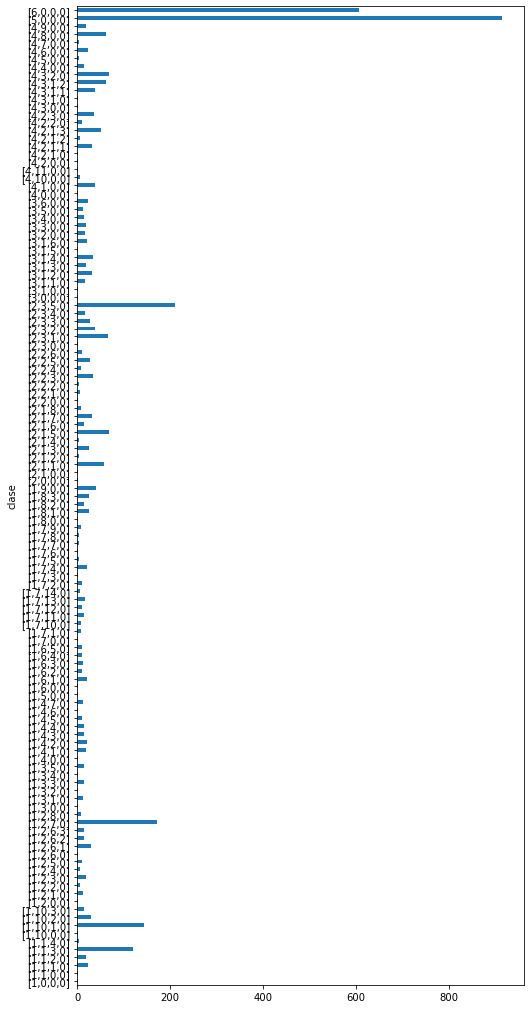

In [9]:
x = df.groupby(['clase'])['ORF'].apply(lambda x: x.notnull().count())
x.plot.barh(figsize=(8, 18))

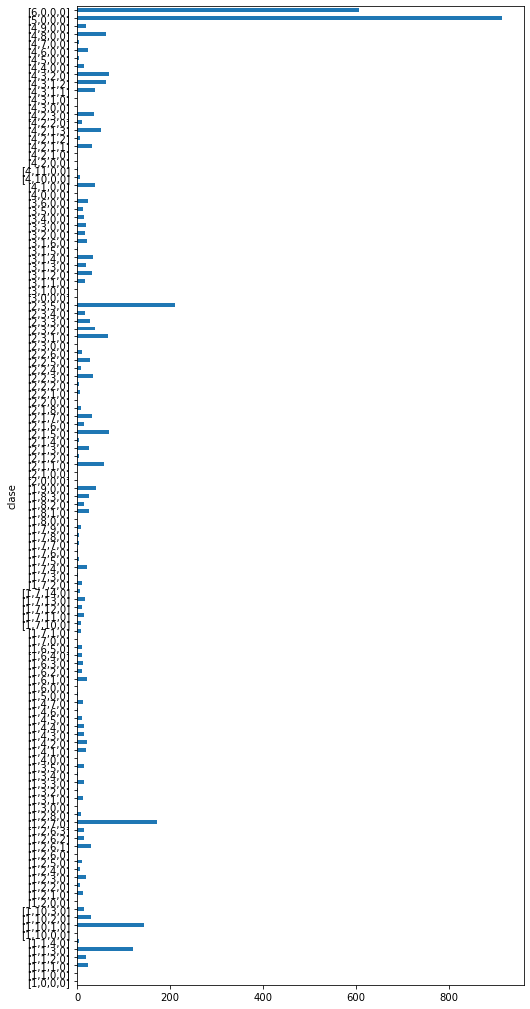

In [10]:
x = df.groupby(['clase'])['ORF'].count()
x.plot.barh(figsize=(8, 18))

In [11]:
def grafico(x):
    ax = x.plot(kind='barh', figsize=(8, 18), color='#86bf91',
                zorder=2, width=0.85)

    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Switch off ticks
    ax.tick_params(axis="both", which="both",
                   bottom="off", top="off", labelbottom="on",
                   left="off", right="off", labelleft="on")

    # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.3,
                   color='#eeeeee', zorder=1)

    # Set x-axis labe
    ax.set_xlabel("Número de ORF", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    ax.set_ylabel("Clase", labelpad=20, weight='bold', size=12)

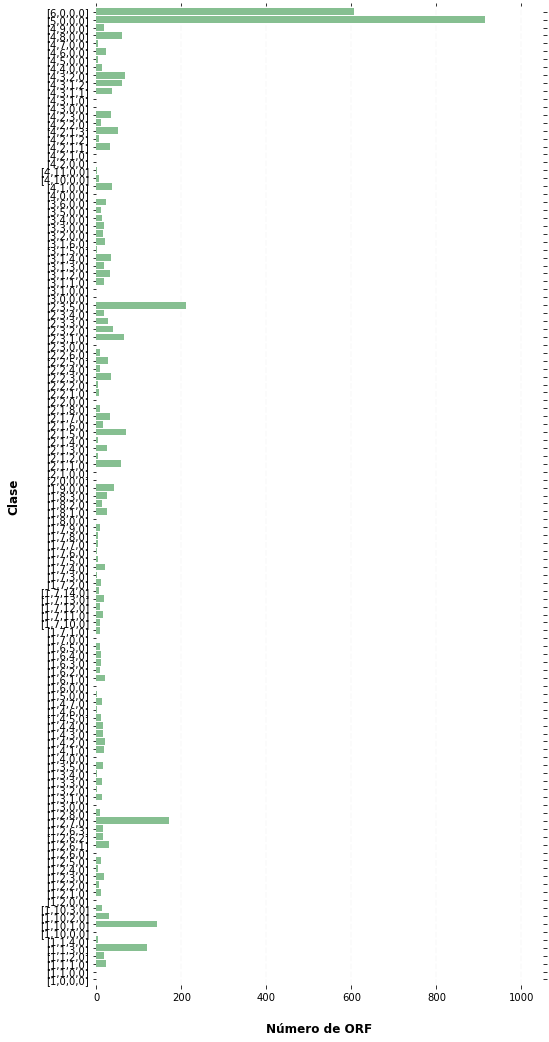

In [12]:
grafico(x)

1.2 Dado que el Bacilo de Koch afecta sobre todo a los pulmones, queremos que mostréis por pantalla cuántos ORFs pertenecen a la clase que tiene Respiration como descripción. Mostrad el resultado por pantalla debidamente formateado (utilizando el método format() u otro similar), incluyendo un mensaje explicativo de los valores que enseñáis.

In [13]:
result_respiration = df[df.desc.str.contains('Respiration', case=False)].sum()
print(
    "Nº de ORF pertenecientes a la clase con Respiration en descripción: {}\n".
    format(
        result_respiration['ORF']))

Nº de ORF pertenecientes a la clase con Respiration en descripción: 0



In [14]:
df[df.desc.str.contains('Respiration',case=False)].apply(lambda x: x.notnull().count())

clase       1
desc        1
ORF         1
name_gem    1
desc_ORF    1
dtype: int64

1:38: E231 missing whitespace after ','
1:80: E501 line too long (87 > 79 characters)


In [15]:
des_ORF_protein = df[df['desc_ORF'].str.contains(r'protein', regex=False, na=False)]
des_ORF_protein

,clase,desc,ORF,name_gem,desc_ORF
37,"[1,1,2,0]",Amino acids and amines,tb1853,"""ureD""","""urease accessory protein"""
38,"[1,1,2,0]",Amino acids and amines,tb1851,"""ureF""","""urease accessory protein"""
39,"[1,1,2,0]",Amino acids and amines,tb1852,"""ureG""","""urease accessory protein"""
162,"[1,1,4,0]",Phosphorous compounds,tb1095,"""phoH2""","""PhoH-like protein"""
220,"[1,2,6,1]",aerobic,tb527,"""ccsA""","""cytochrome c-type biogenesis protein"""
...,...,...,...,...,...
1953,"[4,1,0,0]",Virulence,tb1966,"""mce3""","""cell invasion protein"""
1954,"[4,1,0,0]",Virulence,tb3499,"""mce4""","""cell invasion protein"""
1955,"[4,1,0,0]",Virulence,tb3100,"""smpB""","""probable small protein b"""
2429,"[5,0,0,0]",Conserved hypotheticals,tb1229,"""mrp""","""similar to MRP/NBP35 ATP-binding proteins"""


1:80: E501 line too long (84 > 79 characters)


2.1 El número de clases que contienen como mínimo un ORF con el patrón indicado en su descripción. 

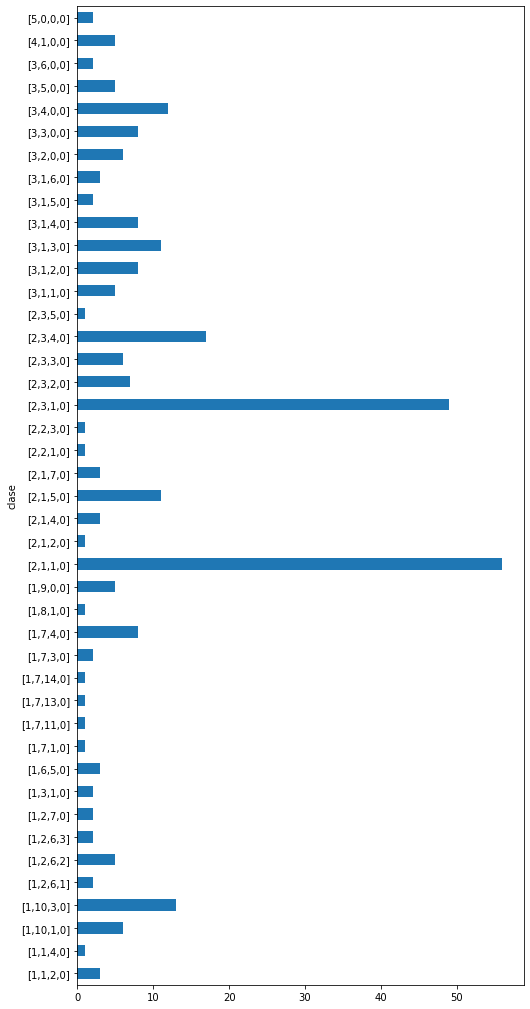

In [16]:
x = des_ORF_protein.groupby(['clase'])['desc_ORF'].count()
x.plot.barh(figsize=(8, 18))

2.2 El número promedio de ORFs con los cuales se relacionan los ORFs con el patrón indicado en su descripción.

In [ ]:
des_ORF_protein.groupby(['ORF']).count()

In [ ]:
des_ORF_hydro_13 = df[df['desc_ORF'].str.contains(r'[a-z_A-Z].hydro[\s\S]{13}')==True]
x = des_ORF_hydro_13.groupby(['clase'])['desc_ORF'].count()
x.plot.barh(figsize=(8, 18))

In [ ]:
des_ORF_hydro_13.groupby(['ORF']).count()

Después, tendréis que generar funciones que os permitan hacer los siguientes cálculos:

1. Dada la colección de clases funcionales:
    <br>1.1 Calcular cuántos ORFs pertenecen a cada clase.
    <br>1.2 Dado que el Bacilo de Koch afecta sobre todo a los pulmones, queremos que mostréis por pantalla cuántos ORFs pertenecen a la clase que tiene *Respiration* como descripción. Mostrad el resultado por pantalla debidamente formateado (utilizando el método `format()` u otro similar), incluyendo un mensaje explicativo de los valores que enseñáis.<br>

2. Para cada patrón listado`*`, calcular:
    <br>2.1 El número de clases que contienen como mínimo un ORF con el patrón indicado en su descripción.
    <br>2.2 El número promedio de ORFs con los cuales se relacionan los ORFs con el patrón indicado en su descripción.<br><br>
    `*` Los patrones para los cuales tendréis que resolver los cálculos 2.1 y 2.2 son:
    - La descripción contiene el término *protein*. Por ejemplo, el ORF con descripción *electron transfer flavoprotein alpha subunit* encajaría con esta definición.
    - La descripción contiene una palabra de 13 caracteres y esta contiene el término *hydro*. Por ejemplo, el ORF con descripción *3-hydroxyacyl-CoA dehydrogenase* encajaría con esta definición.<br>   
    

3. Para cada entero M entre 2 y 9 (ambos incluidos), calcula el número de clases que tienen como mínimo una *dimensión* mayor estricta (>) que 0 y a la vez múltiple de M. Con el término dimensión nos referimos a cada uno de los 4 números que forman el identificador de la clase (explicado en la sección anterior). Este cálculo tendrá que resultar en algo como:
```
M=2: ? clases
M=3: ? clases
...
M=9: ? clases
``` 
donde ? representa un entero.

Además, tendréis que generar código que permita representar todos los resultados gráficamente (excepto para el cálculo 1.1). Para cada función hará falta que penséis y justifiquéis qué tipo de gráfica es la más adecuada para representar el resultado. 

El código tendrá que estar correctamente comentado, incluyendo documentación de funciones, y correctamente testado usando la librería `unittest`. Los tests proporcionados tendrán que dar cobertura como mínimo al 50% de la funcionalidad propuesta.

## Cobertura de los tests
La medición de la cobertura de los tests se utiliza para evaluar la eficacia de los tests propuestos. En particular, sirve para determinar la calidad de los tests desarrollados y para determinar las partes críticas del código que no han sido testadas. Para medir este valor, proponemos el uso de la herramienta [`Coverage.py`](https://coverage.readthedocs.io/en/coverage-5.3/). En la documentación podréis encontrar [cómo instalarla](https://coverage.readthedocs.io/en/coverage-5.3/install.html#install) y [cómo usarla](https://coverage.readthedocs.io/en/coverage-5.3/#quick-start).

Para evaluar la calidad de los tests desarrollados en la PAC4, pedimos un mínimo del 50% de cobertura.

# Uso de Git

Para poner en práctica lo que habéis aprendido en la Unidad 6 sobre `Git`, proponemos el uso de `GitHub Classroom` para desarrollar vuestro paquete de Python. GitHub Classroom es una herramienta gratuita de código abierto que ayuda a simplificar el uso educativo de GitHub. Hemos usado GitHub Classroom para crear una aula como esta y dónde hemos creado una tarea para la PAC4. Para hacer uso de este espacio que hemos creado, os aconsejamos seguir los pasos indicados en esta [guía](https://drive.google.com/file/d/12Ct8leC2wkmIK6c2JMgTGEWtZa7kg9PW/view?usp=sharing) donde se explica cómo crear un repositorio para trabajar en la tarea que hemos preparado. El enlace a la tarea lo encontraréis en el mensaje de la PAC4 publicado en el tablón del aula.

El uso de esta herramienta no es obligatorio para la evaluación de la PAC4, pero creemos que es una muy buena oportunidad para poner en práctica vuestros conocimientos en un entorno vital para todo el mundo que trabaje o quiera trabajar en el ámbito de la ciencia de datos.

Después, tendréis que generar funciones que os permitan hacer los siguientes cálculos:

1. Dada la colección de clases funcionales:
    <br>1.1 Calcular cuántos ORFs pertenecen a cada clase.

    <br>1.2 Dado que el Bacilo de Koch afecta sobre todo a los pulmones, queremos que mostréis por pantalla cuántos ORFs pertenecen a la clase que tiene *Respiration* como descripción. Mostrad el resultado por pantalla debidamente formateado (utilizando el método `format()` u otro similar), incluyendo un mensaje explicativo de los valores que enseñáis.<br>

2. Para cada patrón listado`*`, calcular:
    <br>2.1 El número de clases que contienen como mínimo un ORF con el patrón indicado en su descripción.
    <br>2.2 El número promedio de ORFs con los cuales se relacionan los ORFs con el patrón indicado en su descripción.<br><br>
    `*` Los patrones para los cuales tendréis que resolver los cálculos 2.1 y 2.2 son:
    - La descripción contiene el término *protein*. Por ejemplo, el ORF con descripción *electron transfer flavoprotein alpha subunit* encajaría con esta definición.
    - La descripción contiene una palabra de 13 caracteres y esta contiene el término *hydro*. Por ejemplo, el ORF con descripción *3-hydroxyacyl-CoA dehydrogenase* encajaría con esta definición.<br>  

3. Para cada entero M entre 2 y 9 (ambos incluidos), calcula el número de clases que tienen como mínimo una *dimensión* mayor estricta (>) que 0 y a la vez múltiple de M. Con el término dimensión nos referimos a cada uno de los 4 números que forman el identificador de la clase (explicado en la sección anterior). Este cálculo tendrá que resultar en algo como:
```
M=2: ? clases
M=3: ? clases
...
M=9: ? clases
``` 
donde ? representa un entero.

Además, tendréis que generar código que permita representar todos los resultados gráficamente (excepto para el cálculo 1.1). Para cada función hará falta que penséis y justifiquéis qué tipo de gráfica es la más adecuada para representar el resultado. 

El código tendrá que estar correctamente comentado, incluyendo documentación de funciones, y correctamente testado usando la librería `unittest`. Los tests proporcionados tendrán que dar cobertura como mínimo al 50% de la funcionalidad propuesta.

## Cobertura de los tests
La medición de la cobertura de los tests se utiliza para evaluar la eficacia de los tests propuestos. En particular, sirve para determinar la calidad de los tests desarrollados y para determinar las partes críticas del código que no han sido testadas. Para medir este valor, proponemos el uso de la herramienta [`Coverage.py`](https://coverage.readthedocs.io/en/coverage-5.3/). En la documentación podréis encontrar [cómo instalarla](https://coverage.readthedocs.io/en/coverage-5.3/install.html#install) y [cómo usarla](https://coverage.readthedocs.io/en/coverage-5.3/#quick-start).

Para evaluar la calidad de los tests desarrollados en la PAC4, pedimos un mínimo del 50% de cobertura.

# Uso de Git

Para poner en práctica lo que habéis aprendido en la Unidad 6 sobre `Git`, proponemos el uso de `GitHub Classroom` para desarrollar vuestro paquete de Python. GitHub Classroom es una herramienta gratuita de código abierto que ayuda a simplificar el uso educativo de GitHub. Hemos usado GitHub Classroom para crear una aula como esta y dónde hemos creado una tarea para la PAC4. Para hacer uso de este espacio que hemos creado, os aconsejamos seguir los pasos indicados en esta [guía](https://drive.google.com/file/d/12Ct8leC2wkmIK6c2JMgTGEWtZa7kg9PW/view?usp=sharing) donde se explica cómo crear un repositorio para trabajar en la tarea que hemos preparado. El enlace a la tarea lo encontraréis en el mensaje de la PAC4 publicado en el tablón del aula.

El uso de esta herramienta no es obligatorio para la evaluación de la PAC4, pero creemos que es una muy buena oportunidad para poner en práctica vuestros conocimientos en un entorno vital para todo el mundo que trabaje o quiera trabajar en el ámbito de la ciencia de datos.

# Criterios de corrección

Esta PEC se valorará siguiendo los criterios siguientes:

* **Funcionalidad** (5 puntos): Se valorará que el código implemente correctamente lo que pide el enunciado.
    * Lectura ficheros (1 punto)
    * Ejercicio 1 (0.5 puntos)
    * Ejercicio 2 (1.5 puntos)
    * Ejercicio 3 (1 punto)
    * Visualizaciones (1 punto)
* **Documentación** (0.5 puntos): Todas las funciones de los ejercicios de esta PEC tendrán que estar correctamente documentadas utilizando docstrings (en el formato que prefiráis). 
* **Modularidad** (1 punto): Se valorará la modularidad del código (tanto la organización del código en ficheros como la creación de funciones). 
* **Estilo** (0.5 puntos): El código tiene que seguir la guía de estilo de Python (PEP8), exceptuando los casos donde hacerlo complique la legibilidad del código.
* **Tests** (2 puntos): El código tiene que contener una o varias *suites* de tests que permitan comprobar el buen funcionamiento de las funciones implementadas, obteniendo un mínimo del 50% de cobertura.
* **Requerimientos** (0.5 puntos): Es necesario crear un fichero de requerimientos que liste (sólo) las librerías necesarias para ejecutar el código.
* **README** y **licencia** (0.5 puntos): Se valorará la creación de un fichero README, que presente el proyecto y explique cómo ejecutarlo, así como la inclusión de la licencia bajo la cual se distribuye el código (podéis elegir la que queráis).


## Importante

**Nota 1**: Del mismo modo que en las PECs anteriores, los criterios transversales se valorarán de manera proporcional a la parte de la funcionalidad implementada. 

Por ejemplo, si el código únicamente implementa la mitad de la funcionalidad pedida, y la documentación de esta parte es perfecta, entonces la puntuación correspondiente a la parte de documentación será de 0.25.

**Nota 2**: Es imprescindible que el paquete que entreguéis se ejecute correctamente en la máquina virtual, y que el fichero de README que incluyáis explique claramente cómo se tiene que ejecutar vuestro código para generar las gráficas resultantes del análisis.

**Nota 3**: Entregad el paquete como un único archivo .zip en el Registro de Evaluación Continua. **El código de Python tendrá que estar escrito en ficheros planos de Python.**

In [ ]:
df = pd.read_fwf(r'data/orfs/tb_data_00.txt', header=None)
df.head()

